In [2]:
import pandas as pd
import numpy as np

In [10]:
# 데이터셋 불러오기

# subway데이터셋: 서울시 30분 단위 이용 통계(20~22년)
subway20 = pd.read_csv("data/subway20_df.csv")
subway21 = pd.read_csv("data/subway21_df.csv")
subway22 = pd.read_csv("data/subway22_df.csv")

# EXC데이터셋: 
EXC =  pd.read_csv("data/EXC_df.csv")

# TBVIATR데이터셋: 서울시 주요시설, 집객시설 주요데이터(20년)
TBVIATR = pd.read_csv("data/TBVIATR_df.csv")

# Seoul데이터셋: 서울시 지하철 시간대별 승객수(16~19년)
SEOUL17 = pd.read_csv("data/SEOUL17_df.csv")
SEOUL18 = pd.read_csv("data/SEOUL18_df.csv")
SEOUL19 = pd.read_csv("data/SEOUL19_df.csv")

# STATN데이터셋: 수도권 지하철 공간데이터(19년)
STATN19 = pd.read_csv("data/STATN19_df.csv")

# 1. 시각화

In [11]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 호선별 승하차인원 합계 시각화

In [12]:
subway20['GET_TOTAL'] = subway20['GETON_CNT'] + subway20['GETOFF_CNT']

In [13]:
subway20_total = subway20[['LINE_NM','GET_TOTAL']].groupby('LINE_NM', as_index = False).sum().sort_values('GET_TOTAL')
subway20_total

,LINE_NM,GET_TOTAL
10,우이신설선,21776882
9,9호선2~3단계,40225256
0,1호선,72162962
7,8호선,84974557
8,9호선,117855526
5,6호선,152601931
3,4호선,227004039
2,3호선,232190958
4,5호선,286124371
6,7호선,315170457


Text(0.5, 1.0, '20년 호선별 승하차인원 합계')

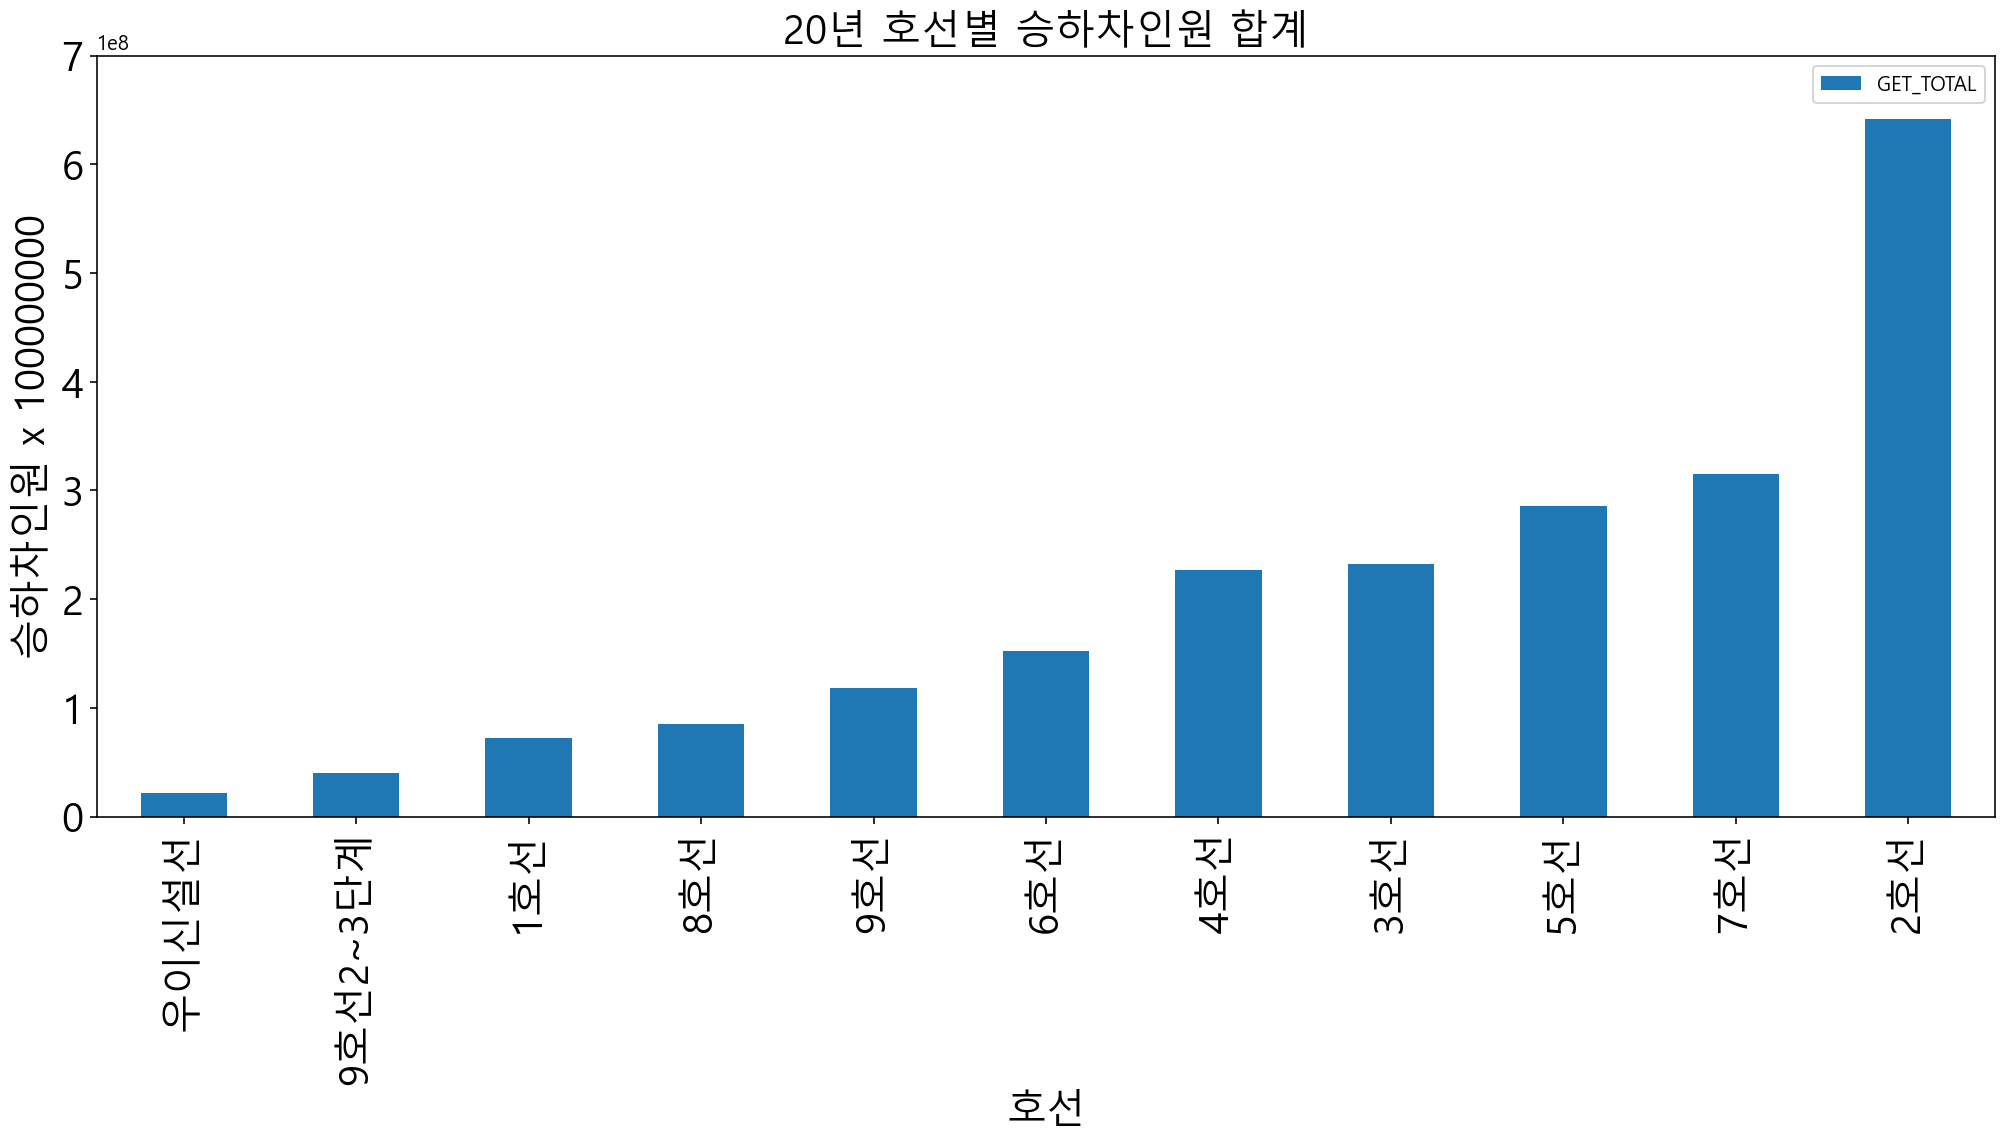

In [17]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize = (12, 12))
subway20_total.plot.bar(x = 'LINE_NM', y = 'GET_TOTAL', fontsize = 20, figsize = (17, 7))
plt.xlabel('호선', fontsize = 20)
plt.ylabel('승하차인원 x 100000000', fontsize = 20)
plt.ylim([0, 700000000])
plt.title("20년 호선별 승하차인원 합계", fontsize = 20)

## 역별 승하차인원 시각화

In [24]:
# 역별 승하차 인원 확인
subway20['GET_TOTAL'] = subway20['GETON_CNT'] + subway20['GETOFF_CNT']
subway20
subway20_sort = subway20.sort_values(ascending = False, by = 'GET_TOTAL')
subway20_sort.groupby(['STATION_NM', 'LINE_NM']).sum('GET_TOTAL')[['GET_TOTAL']].sort_values('GET_TOTAL', ascending = False).head(15)

,,GET_TOTAL
STATION_NM,LINE_NM,
강남,2호선,42188448
잠실(송파구청),2호선,34778138
신림,2호선,31905562
구로디지털단지,2호선,28556403
홍대입구,2호선,25287511
서울대입구(관악구청),2호선,23965740
삼성(무역센터),2호선,23464178
선릉,2호선,22906969
역삼,2호선,22070781


In [30]:
subway20 = subway20.pivot_table(index='STATION_NM', values=['GETON_CNT','GETOFF_CNT'], aggfunc='sum').reset_index()
subway20
subway20_sort = subway20.sort_values(by='GETOFF_CNT', ascending=False)
subway20_sort

,STATION_NM,GETOFF_CNT,GETON_CNT
5,강남,21400896,20787552
236,잠실(송파구청),21004378,20994812
19,고속터미널,18144644,17876809
178,신림,15632652,16272910
125,사당,15348165,15349740
...,...,...,...
222,용마산,258554,273103
241,장암,251592,626055
78,둔촌오륜,229237,249536
48,남태령,215328,256613


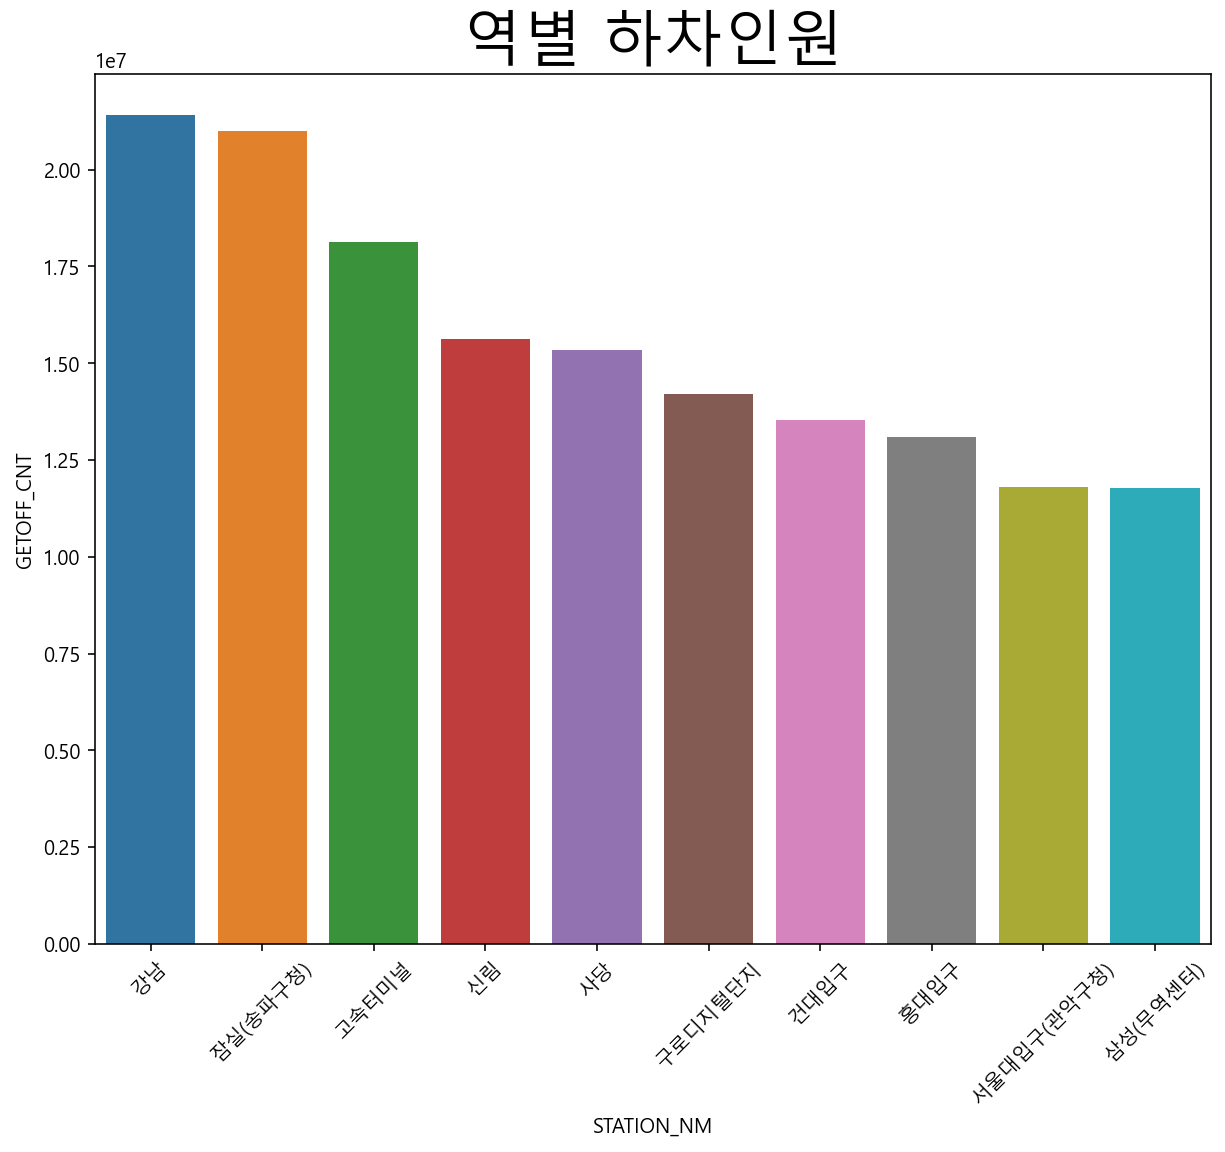

In [32]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 하차인원', fontsize=30)
sw_s = sns.barplot(data=subway20_sort.head(10), x='STATION_NM', y='GETOFF_CNT')

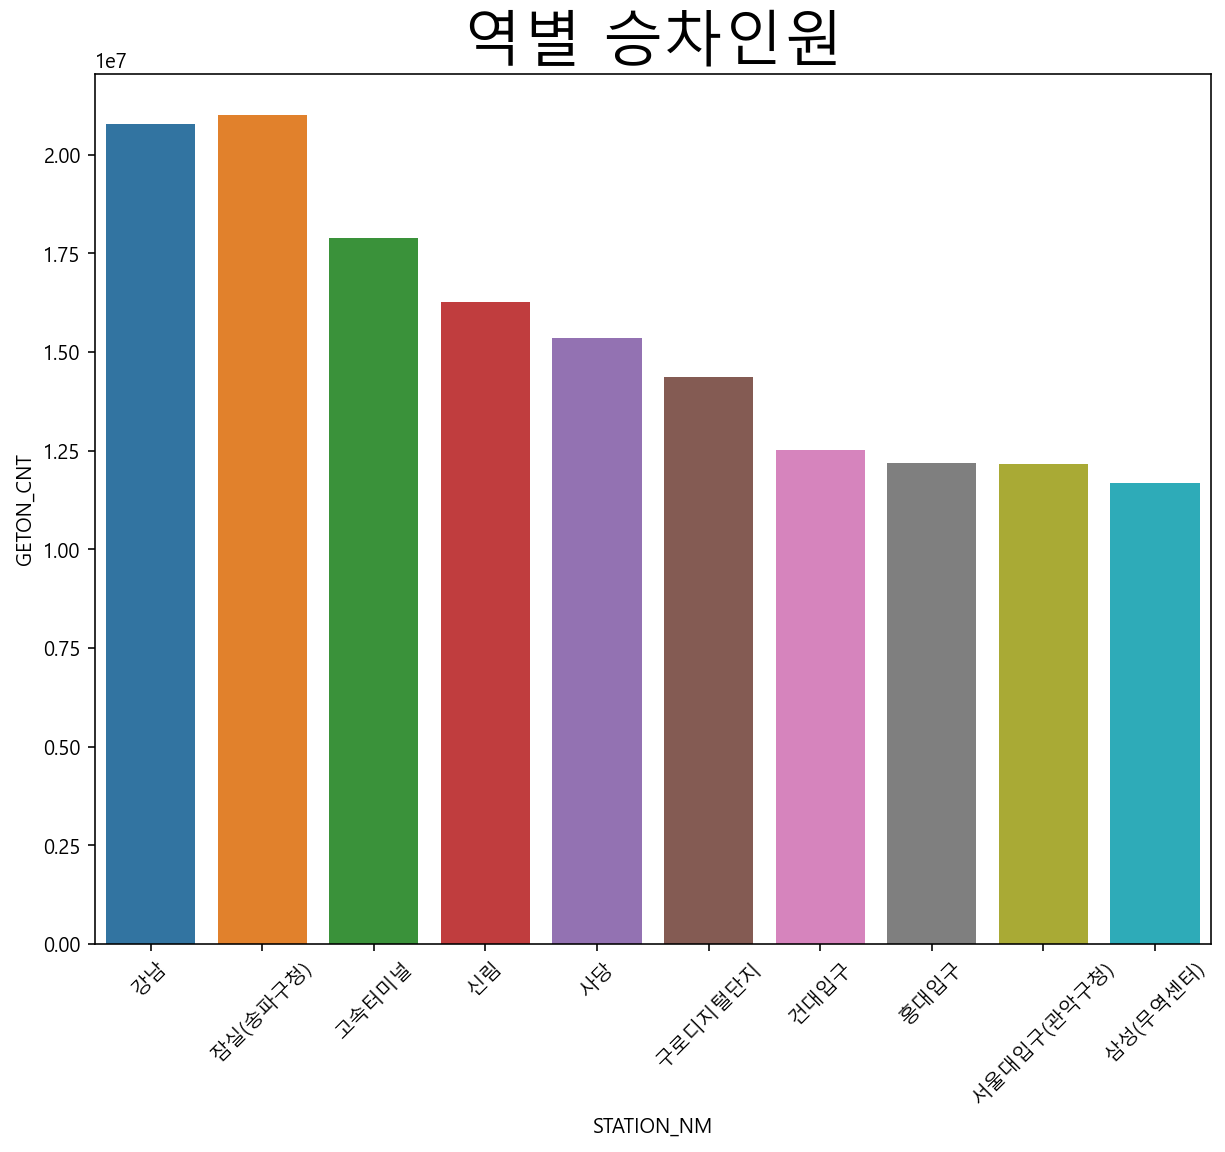

In [33]:
import seaborn as sns

sw_s = plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sw_s = plt.title('역별 승차인원', fontsize=30)
sw_s = sns.barplot(data=subway20_sort.head(10), x='STATION_NM', y='GETON_CNT')

# 강남과 잠실의 순서가 승차인원과 하차인원에서 다르다.

## 노선별 요일별 승객수 시각화